In [388]:
# Import 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [389]:
# Create dataframe 
df = pd.read_excel ('Pokemon_Gen_1-8.xlsx') # https://www.kaggle.com/tlegrand/pokemon-with-stats-generation-8#Pokemon_Gen_1-8.csv
df.drop(columns = ['#' ,'Total', 'Average'], axis=1, inplace=True)
pd.set_option('display.max_rows', df.shape[0]+1)

In [390]:
# Check dataframe
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,Venusaur (Mega Venusaur),Grass,Poison,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,39,52,43,60,50,65,1
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1
6,Charizard,Fire,Flying,78,84,78,109,85,100,1
7,Charizard (Mega Charizard X),Fire,Dragon,78,130,111,130,85,100,1
8,Charizard (Mega Charizard Y),Fire,Flying,78,104,78,159,115,100,1
9,Squirtle,Water,NaN,44,48,65,50,64,43,1


# Data Cleaning

In [391]:
# Create Variables for different forms
df['Mega'] = df['Name'].apply(lambda x : 1 if 'Mega ' in x else 0)
df['GalarForm'] = df['Name'].apply(lambda x : 1 if 'Galarian ' in x else 0)
df['AlolanForm'] = df['Name'].apply(lambda x: 1 if 'Alolan' in x else 0)

In [392]:
# Check How many of each for are in each column
df.Mega.value_counts()


0    969
1     48
Name: Mega, dtype: int64

In [393]:
df.GalarForm.value_counts()

0    1003
1      14
Name: GalarForm, dtype: int64

In [394]:
df.AlolanForm.value_counts()

0    999
1     18
Name: AlolanForm, dtype: int64

In [395]:
# Create a List of Legendary Pokemon
legendary = ['Articuno', 'Zapdos', 'Moltres', 'Mew', 'Mewtwo', 'Mewtwo (Mega Mewtwo X)', 'Mewtwo (Mega Mewtwo Y)', 
             'Raikou', 'Suicune', 'Entei', 'Lugia', 'Ho-Oh', 'Celebi'
             'Regirock', 'Registeel', 'Regice', 'Latios', 'Latias','Kyogre (Primal Kyogre)', 'Groudon (Primal Groundon)', 'Jirachi',
             'Kyogre', 'Groudon', 'Rayquaza', 'Deoxys (Normal Forme)', 'Deoxys (Attack Forme)', 'Deoxys (Defense Forme)', 'Deoxys (Speed Forme)'
             'Latias (Mega Latias)', 'Latios (Mega Latios)', 
             'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatan', 'Regigigas', 'Cresselia', 'Shaymin', 
             'Shaymin (Land Forme)', 'Shaymin (Sky Forme)'
             'Giratina (Altered Forme)', 'Giratina (Origin Forme)'
             'Cobalion', 'Terrakion', 'Virizion', 'Reshiram', 'Zekrom', 'Kyurem', 'Manaphy', 'Phione', 'Arcues', 
             'Tornadus (Therian Forme)', 'Tornadus (Incarnate Forme)',
             'Thundurus (Incarnate Forme)', 'Thundurus (Therian Forme)',
             'Landorus (Incarnate Forme)', 'Landorus (Therian Forme)',
             'Kyurem (Normal Kyurem)', 'Kyurem (Black Kyurem)', 'Kyurem (White Kyurem)',
             'Meloetta (Aria Forme)', 'Meloetta (Pirouette Forme)',
             'Xerneas', 'Yveltal', 'Type: Null', 'Silvally', 'Zygarde (50% Forme)', 'Zygarde (10% Forme)', 'Zygarde (Complete Forme)',
             'Hoopa (Hoopa Confined)', 'Hoopa (Hoopa Unbound)', 
             'Necrozma (Dusk Mane)', 'Necrozma (Dawn Wings)', 'Necrozma (Ultra Necrozma)',
             'Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Necrozma', 
             'Zacian', 'Zacian (Hero of Many Battles)', 'Zacian (Crowned Sword)', 'Zamazenta (Hero of Many Battles)', 'Zamazenta (Crowned Shield)'
             'Zamazenta', 'Eternatus', 'Eternatus (Eternamax)',
            'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree', 'Celesteela', 'Kartana', 'Guzzlord', 'Poipole', 'Naganadel', 'Stakataka', 'Blacephalon'
             'Victini', 'Keldeo', 'Marshadow'
            ]
             

In [396]:
# Create column for legendary pokemon
df['Legend'] = np.where(df['Name'].isin(legendary), 1, 0)

In [397]:
# Creating Target Variable for Most used pokemon
Most_used = ['Aegislash','Arceus','Blaziken',
'Blaziken (Mega Blaziken)', 'Darkrai', 'Deoxys', 'Deoxys (Normal Forme)', 'Deoxys (Attack Forme)', 'Deoxys (Defense Forme)', 'Deoxys (Speed Forme)',
'Darkrai', 'Dialga', 'Genesect', 'Genger (Mega Gengar)','Giratina', 'Giratina (Origin Forme)', 'Groudon', 'Groudon (Primal Forme)',
'Ho-Oh', 'Kangaskhan (Mega Kangaskhan)', 'Kyogre', 'Kyogre (Primal Kyogre)', 'Kyurem (White Kyurem)', 
'Landorus', 'Lucario (Mega Lucario)', 'Lugia', 'Lunala', 'Marshadow', 'Metagross (Mega Metagross)', 'Mewtwo', 'Mewtwo (Mega Mewtwo X)', 'Mewtwo (Mega Mewtwo Y)', 
'Naganadel', 'Necrozma (Dusk Mane)', 'Necrozma (Dawn Wings)', 'Necrozma (Ultra Necrozma)', 'Palkia', 'Pheromosa','Rayquaza', 'Reshiram'
'Salamence (Mega Salamance)', 'Shaymin (Sky Forme)', 'Solgaleo', 'Xerneas', 'Yveltal', 'Zekrom', 'Zygarde (Complete Forme)',
'Alakazam (Mega Alakazam)', 'Blacephalon', 'Celesteela', 'Chansey', 'Charizard (Mega Charizard Y)', 'Charizard (Mega Charizard X)',
'Clefable', 'Diancie (Mega Diance)','Excadrill', 'Ferrothorn', 'Garchomp', 'Garchomp (Mega Garchomp)','Gliscor','Greninja',
'Greninja (Ash-Greninja)', 'Gyarados (Mega Gyarados)', 'Hawlucha','Heatran', 'Jirachi','Kartana', 'Keldeo','Kyurem (Black Kyurem)',
'Landorus (Therian Forme)', 'Lopunny (Mega Lopunny)', 'Magearna','Magnezone', 'Mawile (Mega Mawile)', 'Medicham (Mega Medicham)',
'Mew', 'Mimikyu', 'Pelipper', 'Pinsir (Mega Pinsir)', 'Rotom (Wash Rotom)', 'Sableye (Mega Sableye)','Scizor (Mega Scizor)'
'Serperior','Skarmory','Swampert (Mega Swampert)','Tangrowth','Tapu Bulu','Tapu Fini','Tapu Koko','Tapu Lele'
'Thundurus (Therian Forme), Toxapex', 'Tyranitar', 'Tyranitar (Mega Tyranitar)', 'Victini','Volcarona','Zapdos','Zygarde ','Alakazam',
'Azumarill','Breloom','Buzzwole','Conkeldurr','Diggersby','Dragonite', 'Gallade (Mega Gallade)', 'Gardevoir (Mega Gardevoir)', 'Hoopa (Hoopa Unbound)', 'Gyarados',
'Heracross (Mega Heracross)', 'Latias (Mega Latias)', 'Latios', 'Latios (Mega Latios)', 'Manaphy'
'Ninetales (Alolan Ninetales)', 'Porygon-Z', 'Salamence', 'Scolipede', 'Staraptor', 'Thundurus', 
'Thundurus (Therian Forme)', 'Venusaur (Mega Venusaur)', 'Weavile', 'Xurkitree']

In [398]:
# Create column for most used pokemon. Also Our target
df['Most_used'] = np.where(df['Name'].isin(Most_used), 1, 0)

In [399]:
# Check Values for new columns
df.Legend.value_counts()

0    929
1     88
Name: Legend, dtype: int64

In [400]:
df.Most_used.value_counts()

0    912
1    105
Name: Most_used, dtype: int64

In [401]:
# Drop variables that are not helpful for classification
df.drop('Name', axis=1, inplace=True)
df.drop('Type 1', axis=1, inplace=True)
df.drop('Type 2', axis=1, inplace=True)

# Blind Models

In [402]:
# Import split Model
from sklearn.model_selection import train_test_split

In [403]:
# Create X and y and split
y = df.Most_used
X = df.drop('Most_used', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

## Balanced Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
logreg = LogisticRegression(class_weight= 'balanced')

logreg.fit(X_train, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [305]:
# View Predictions for models
pred = logreg.predict(X_test)
f1_score(y_test, pred)

0.52

## Bagging Classifier

In [275]:
from sklearn.ensemble import BaggingClassifier 

In [276]:
bag = BaggingClassifier(random_state = 1, n_estimators = 15, max_samples = 100)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=100, n_estimators=15,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [277]:
pred = bag.predict(X_test)
f1_score(y_test, pred)

0.4137931034482759

In [338]:
accuracy_score(y_test, pred)

0.9166666666666666

### GridSearch With Bagging Classified

In [309]:
from sklearn.model_selection import GridSearchCV

In [310]:
params = {'max_features' : (1, 3, 5, 7, 9),
         'max_samples': (25, 50, 75, 100),
         'n_estimators': (5, 10, 15)}

In [311]:
gsearchbag = GridSearchCV(
    estimator = bag,
    param_grid = params,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1,
    iid = False,
    cv = 5)

In [312]:
gsearchbag.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=100,
                                         n_estimators=15, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_features': (1, 3, 5, 7, 9),
                         'max_samples': (25, 50, 75, 100),
                         'n_estimators': (5, 10, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [313]:
gsearchbag.best_params_

{'max_features': 9, 'max_samples': 25, 'n_estimators': 10}

In [314]:
gsearchbag.best_score_

0.5186780626780626

In [315]:
preds = gsearchbag.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.906863
F1: 0.240000


## XGBoost

In [404]:
import xgboost as xgb

In [405]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)

In [406]:
f1_score(y_test, pred)

0.3870967741935483

In [407]:
accuracy_score(y_test, pred)

0.9068627450980392

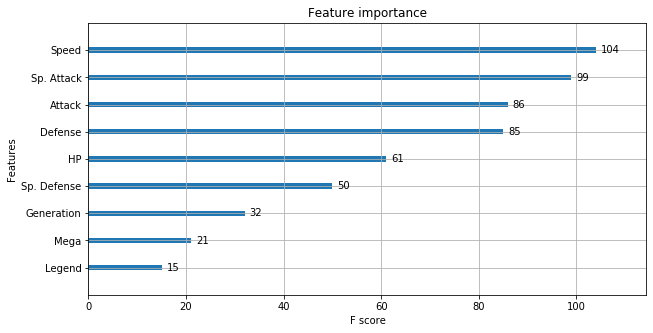

In [408]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

In [322]:
clf_xgb.feature_importances_

array([0.04018183, 0.2353664 , 0.        , 0.        , 0.32549623,
       0.12656723, 0.06551344, 0.03918518, 0.03989232, 0.05491118,
       0.07288617], dtype=float32)

### XGBoost with GridSearch

In [323]:
xgb.XGBClassifier()

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')

In [324]:
params_dist = {'learning rate' : (.1, .3,),
         'max_samples': (5, 7, 9),
         'max_depth': (5, 7, 9),
         'min_child_weight': (3, 5, 7),
         'n_estimators': (75, 100)}

In [325]:
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = params_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   16.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'learning rate': (0.1, 0.3), 'max_depth': (5, 7, 9),
                         'max_samples': (5, 7, 9),
                         'min_child_weigh

In [326]:
gsearch1.best_params_

{'learning rate': 0.1,
 'max_depth': 7,
 'max_samples': 5,
 'min_child_weight': 3,
 'n_estimators': 75}

In [327]:
gsearch1.best_score_

0.5053447185325742

In [328]:
preds = gsearch1.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.921569
F1: 0.529412


## Knn

In [281]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)

In [282]:
test_f1 = f1_score(y_test, y_pred)
test_f1

0.32

In [283]:
accuracy_score(y_test, y_pred)

0.9166666666666666

### Checking Optimal K values

In [249]:
k_scores =[]

k_range = list(range(1,12))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    
    y_pred =knn.predict(X_test)
    
    test_f1 = f1_score(y_test, y_pred)
    
    k_scores.append(test_f1)
    print(k_scores)

[0.4324324324324324]
[0.4324324324324324, 0.24]
[0.4324324324324324, 0.24, 0.43749999999999994]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645, 0.4137931034482759]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645, 0.4137931034482759, 0.45161290322580644]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645, 0.4137931034482759, 0.45161290322580644, 0.3076923076923077]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645, 0.4137931034482759, 0.45161290322580644, 0.3076923076923077, 0.35714285714285715]
[0.4324324324324324, 0.24, 0.43749999999999994, 0.3076923076923077, 0.5161290322580645, 0.4137931034482759, 0.45161290322580644, 0.3076923076923077, 0.35714285714285715, 0.3076923076923077]
[0

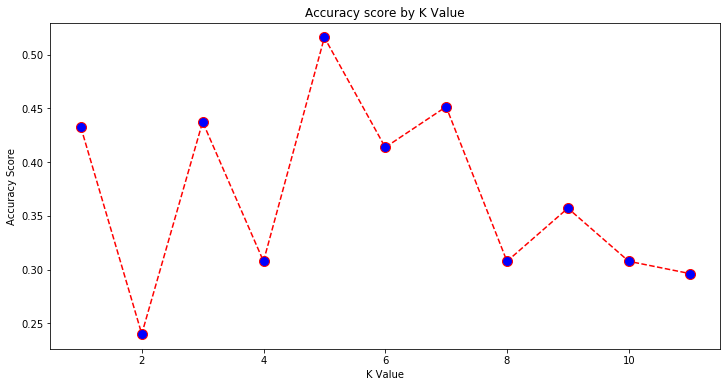

In [250]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [251]:
# Best K seems to be 5

## Random Forrest

In [284]:
from sklearn.ensemble import RandomForestClassifier 

In [285]:
clf_cv = RandomForestClassifier(random_state=27, class_weight = 'balanced')
clf_cv.fit(X_train, y_train)
preds = clf_cv.predict(X_test)
f1_score(y_test, preds)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3243243243243243

In [344]:
accuracy_score(y_test, preds)

0.8921568627450981

In [335]:
clf_cv.fit(X_train, y_train).feature_importances_

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.16798237, 0.060615  , 0.00218564, 0.00137047, 0.13543175,
       0.1699246 , 0.10903039, 0.05789908, 0.06788205, 0.06735724,
       0.16032141])

In [337]:
X_train.columns

Index(['Generation', 'Mega', 'GalarForm', 'AlolanForm', 'Legend', 'AttackBin',
       'Sp. Attack_bin', 'Sp. Defense_bin', 'Defense_bin', 'HP_bin',
       'SpeedBin'],
      dtype='object')

In [381]:
importances = clf_cv.feature_importances_
importances

array([0.16798237, 0.060615  , 0.00218564, 0.00137047, 0.13543175,
       0.1699246 , 0.10903039, 0.05789908, 0.06788205, 0.06735724,
       0.16032141])

### Random Forrest Grid Search

In [329]:
clf_cv = RandomForestClassifier(random_state=27, class_weight = 'balanced')
param_dist = {
    'n_estimators' : (125, 150),
    'min_samples_leaf' : (5, 7, 9, 12),
    'max_depth': (7, 9, 12),
    'max_leaf_nodes' : (25, 50),
    'max_features': (3, 5, 7),
    'min_samples_split': (7, 8, 11 )
    }




In [330]:
gsearchrf = GridSearchCV(
    estimator = clf_cv,
    param_grid = param_dist,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False,
    cv=5)

gsearchrf.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=27,
                                              verbose=0, warm_start=False),
            

In [331]:
gsearchrf.best_params_

{'max_depth': 9,
 'max_features': 3,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 150}

In [332]:
gsearchrf.best_score_

0.5696021887015675

In [333]:
preds = gsearchrf.best_estimator_.predict(X_test)
test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.892157
F1: 0.560000


# EDA

In [182]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [59]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Attack',
       'Sp. Defense', 'Speed', 'Generation'],
      dtype='object')

Text(0.5, 1.0, 'Box of stats')

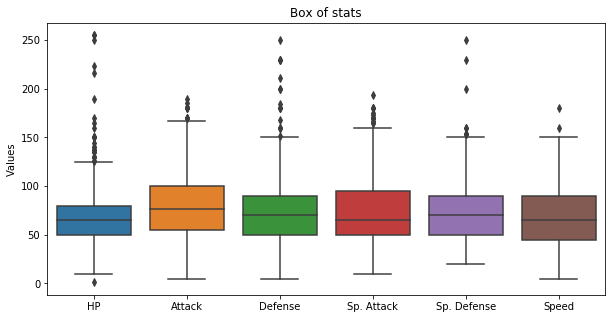

In [416]:
stats = df.drop(columns = ['Generation','Mega', 'GalarForm', 'AlolanForm', 'Legend', 'Most_used'], axis=1)
sns.boxplot(data=stats)
plt.ylabel("Values")
plt.title("Box of stats")

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


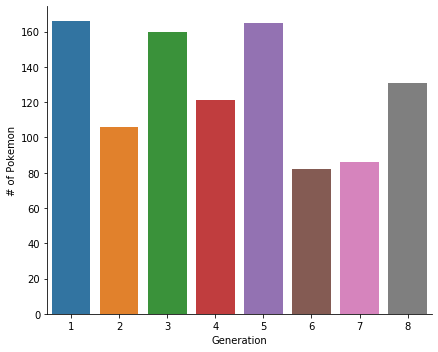

In [67]:
sns.factorplot(
    x='Generation', 
    data=df,
    size=5,
    aspect=1.2,
    kind='count'
).set_axis_labels('Generation', '# of Pokemon')

plt.show()

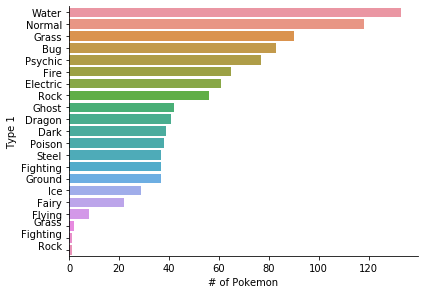

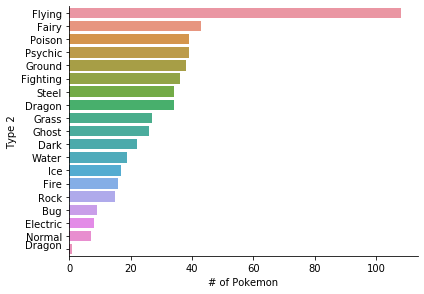

In [71]:
sns.factorplot(
    y='Type 1',
    data=df,
    kind='count',
    order=df['Type 1'].value_counts().index,
    size=4,
    aspect=1.5,
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='Type 2',
    data=df,
    kind='count',
    order=df['Type 2'].value_counts().index,
    size=4,
    aspect=1.5,).set_axis_labels('# of Pokemon', 'Type 2');

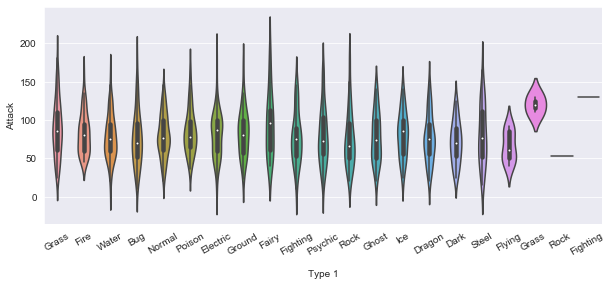

In [75]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
 
#Violin Plot
vio_plot = sns.violinplot(x='Type 1', y='Attack',data=df)
plt.xticks(rotation=30)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 15

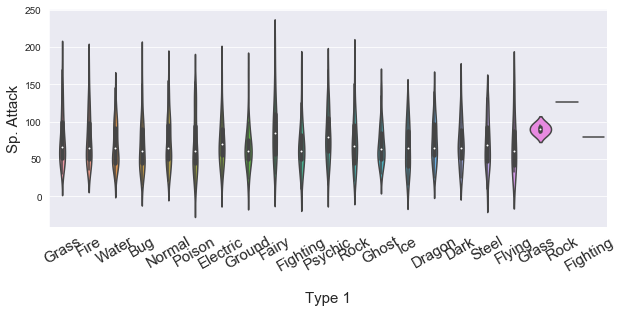

In [76]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
 
#Violin Plot
vio_plot = sns.violinplot(x='Type 1', y='Sp. Attack',data=df)
plt.xticks(rotation=30)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 15

# Feature Engineering

In [259]:
df['Attack'].value_counts().to_string().split('\n')

['100    51',
 '65     48',
 '80     46',
 '60     43',
 '85     43',
 '55     40',
 '75     40',
 '90     39',
 '50     38',
 '70     36',
 '95     36',
 '45     33',
 '40     30',
 '120    27',
 '30     23',
 '105    22',
 '110    21',
 '125    20',
 '130    20',
 '115    17',
 '35     17',
 '20     10',
 '150    10',
 '140     9',
 '63      8',
 '25      8',
 '52      8',
 '48      8',
 '82      8',
 '66      7',
 '73      7',
 '92      7',
 '53      7',
 '64      7',
 '135     7',
 '72      6',
 '160     6',
 '98      6',
 '84      5',
 '62      5',
 '78      5',
 '58      5',
 '69      5',
 '145     5',
 '107     4',
 '89      4',
 '67      4',
 '76      4',
 '77      4',
 '38      4',
 '81      4',
 '83      4',
 '47      4',
 '131     4',
 '56      4',
 '68      4',
 '123     4',
 '117     4',
 '29      3',
 '10      3',
 '71      3',
 '180     3',
 '170     3',
 '103     3',
 '165     3',
 '59      3',
 '101     3',
 '86      3',
 '57      3',
 '49      3',
 '112     3',
 '41  

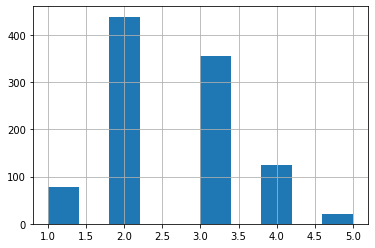

In [260]:
df['AttackBin'] = 0 #creates a column of 0
df.loc[((df['Attack'] >= 0) & (df['Attack'] < 40)) , 'AttackBin'] = 1
df.loc[((df['Attack'] >= 40) & (df['Attack'] < 80)) , 'AttackBin'] = 2
df.loc[((df['Attack'] >= 80) & (df['Attack'] < 120)) , 'AttackBin'] = 3
df.loc[((df['Attack'] >= 120) & (df['Attack'] < 160)) , 'AttackBin'] = 4
df.loc[((df['Attack'] >= 160) & (df['Attack'] < 200)) , 'AttackBin'] = 5
df.AttackBin.hist()

In [261]:
df['Sp. Attack'].value_counts().to_string().split('\n')

['40     67',
 '60     60',
 '65     54',
 '50     54',
 '55     50',
 '80     40',
 '45     38',
 '70     38',
 '95     38',
 '30     34',
 '100    34',
 '35     32',
 '90     29',
 '85     29',
 '75     24',
 '105    21',
 '110    18',
 '125    17',
 '120    15',
 '25     15',
 '130    13',
 '20     10',
 '115     9',
 '58      8',
 '135     8',
 '53      8',
 '150     8',
 '44      8',
 '81      7',
 '83      7',
 '145     7',
 '61      7',
 '74      6',
 '62      6',
 '140     6',
 '63      5',
 '73      5',
 '97      5',
 '15      5',
 '54      5',
 '91      5',
 '92      4',
 '48      4',
 '43      4',
 '86      4',
 '59      4',
 '69      4',
 '56      4',
 '10      4',
 '98      4',
 '109     4',
 '114     4',
 '47      3',
 '42      3',
 '77      3',
 '127     3',
 '79      3',
 '71      3',
 '37      3',
 '180     3',
 '68      3',
 '87      3',
 '29      3',
 '170     3',
 '57      3',
 '72      3',
 '46      2',
 '49      2',
 '137     2',
 '160     2',
 '154     2',
 '38  

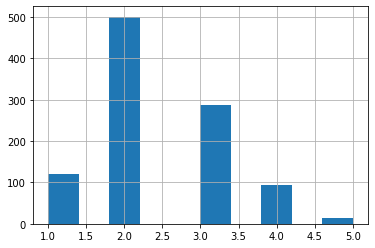

In [262]:
df['Sp. Attack_bin'] = 0 #creates a column of 0
df.loc[((df['Sp. Attack'] >= 0) & (df['Sp. Attack'] < 40)) , 'Sp. Attack_bin'] = 1
df.loc[((df['Sp. Attack'] >= 40) & (df['Sp. Attack'] < 80)) , 'Sp. Attack_bin'] = 2
df.loc[((df['Sp. Attack'] >= 80) & (df['Sp. Attack'] < 120)) , 'Sp. Attack_bin'] = 3
df.loc[((df['Sp. Attack'] >= 120) & (df['Sp. Attack'] < 160)) , 'Sp. Attack_bin'] = 4
df.loc[((df['Sp. Attack'] >= 160) & (df['Sp. Attack'] < 200)) , 'Sp. Attack_bin'] = 5
df['Sp. Attack_bin'].hist()

In [263]:
df['Sp. Defense'].value_counts().to_string().split('\n')

['50     64',
 '80     59',
 '60     55',
 '70     54',
 '65     53',
 '55     53',
 '75     51',
 '90     49',
 '45     43',
 '40     41',
 '85     38',
 '95     37',
 '100    35',
 '30     27',
 '35     25',
 '105    22',
 '110    17',
 '120    15',
 '115    15',
 '130    12',
 '25     12',
 '63     10',
 '48     10',
 '56      8',
 '107     7',
 '20      7',
 '61      6',
 '150     6',
 '52      6',
 '71      6',
 '42      5',
 '86      5',
 '82      5',
 '41      5',
 '79      5',
 '135     5',
 '53      5',
 '73      4',
 '89      4',
 '72      4',
 '37      4',
 '69      4',
 '54      4',
 '67      4',
 '62      4',
 '81      4',
 '98      4',
 '49      3',
 '66      3',
 '140     3',
 '43      3',
 '154     3',
 '101     3',
 '116     3',
 '44      3',
 '77      3',
 '38      3',
 '58      3',
 '96      3',
 '31      3',
 '87      3',
 '83      3',
 '125     2',
 '46      2',
 '131     2',
 '59      2',
 '57      2',
 '39      2',
 '76      2',
 '160     2',
 '92      2',
 '142 

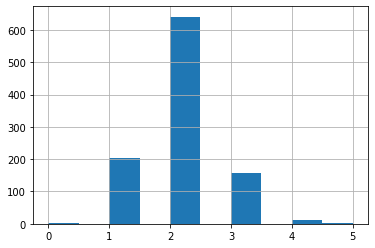

In [264]:
df['Sp. Defense_bin'] = 0 #creates a column of 0
df.loc[((df['Sp. Defense'] >= 0) & (df['Sp. Defense'] < 50)) , 'Sp. Defense_bin'] = 1
df.loc[((df['Sp. Defense'] >= 50) & (df['Sp. Defense'] < 100)) , 'Sp. Defense_bin'] = 2
df.loc[((df['Sp. Defense'] >= 100) & (df['Sp. Defense'] < 150)) , 'Sp. Defense_bin'] = 3
df.loc[((df['Sp. Defense'] >= 150) & (df['Sp. Defense'] < 200)) , 'Sp. Defense_bin'] = 4
df.loc[((df['Sp. Defense'] >= 200) & (df['Sp. Defense'] <250)) , 'Sp. Defense_bin'] = 5
df['Sp. Defense_bin'].hist()

In [265]:
df['Defense'].value_counts().to_string().split('\n')

['70     63',
 '50     62',
 '60     58',
 '80     50',
 '65     48',
 '90     48',
 '40     46',
 '55     43',
 '100    43',
 '75     40',
 '45     38',
 '95     35',
 '85     33',
 '35     29',
 '115    19',
 '30     18',
 '120    16',
 '105    16',
 '110    15',
 '130    13',
 '48     12',
 '67      9',
 '125     8',
 '140     8',
 '63      8',
 '62      8',
 '58      8',
 '77      7',
 '53      7',
 '78      6',
 '72      6',
 '107     6',
 '43      6',
 '52      6',
 '150     6',
 '20      6',
 '57      5',
 '122     5',
 '88      4',
 '44      4',
 '135     4',
 '145     4',
 '79      4',
 '64      4',
 '86      4',
 '69      4',
 '71      4',
 '15      4',
 '37      4',
 '49      3',
 '42      3',
 '68      3',
 '73      3',
 '41      3',
 '131     3',
 '76      3',
 '38      3',
 '66      3',
 '230     3',
 '83      3',
 '34      3',
 '47      3',
 '160     3',
 '180     3',
 '54      2',
 '61      2',
 '200     2',
 '109     2',
 '32      2',
 '25      2',
 '91      2',
 '103 

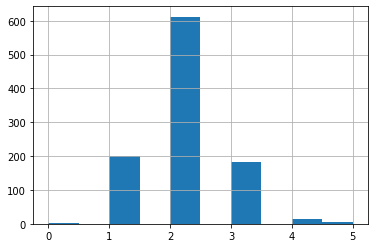

In [266]:
df['Defense_bin'] = 0 #creates a column of 0
df.loc[((df['Defense'] >= 0) & (df['Defense'] < 50)) , 'Defense_bin'] = 1
df.loc[((df['Defense'] >= 50) & (df['Defense'] < 100)) , 'Defense_bin'] = 2
df.loc[((df['Defense'] >= 100) & (df['Defense'] < 150)) , 'Defense_bin'] = 3
df.loc[((df['Defense'] >= 150) & (df['Defense'] < 200)) , 'Defense_bin'] = 4
df.loc[((df['Defense'] >= 200) & (df['Defense'] <250)) , 'Defense_bin'] = 5
df['Defense_bin'].hist()

In [267]:
df['HP'].value_counts().to_string().split('\n')

['60     82',
 '50     76',
 '70     73',
 '65     58',
 '75     55',
 '80     53',
 '40     48',
 '45     46',
 '55     41',
 '100    37',
 '90     36',
 '95     27',
 '85     22',
 '35     17',
 '30     16',
 '68     13',
 '105    13',
 '78     13',
 '38     11',
 '110    11',
 '72     10',
 '58      8',
 '59      8',
 '62      8',
 '79      7',
 '97      7',
 '44      7',
 '48      6',
 '91      6',
 '73      6',
 '20      6',
 '67      6',
 '64      6',
 '61      6',
 '71      5',
 '76      5',
 '57      5',
 '54      5',
 '120     5',
 '92      5',
 '106     5',
 '43      5',
 '52      5',
 '42      4',
 '108     4',
 '25      4',
 '74      4',
 '41      4',
 '125     4',
 '77      4',
 '150     4',
 '83      4',
 '86      4',
 '88      4',
 '115     3',
 '63      3',
 '103     3',
 '130     3',
 '49      3',
 '53      3',
 '69      3',
 '89      3',
 '109     3',
 '66      3',
 '46      3',
 '28      2',
 '47      2',
 '10      2',
 '51      2',
 '39      2',
 '255     2',
 '123 

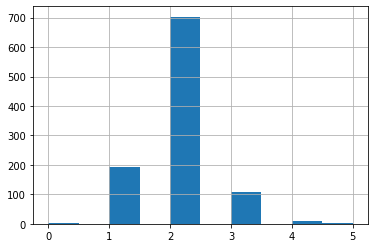

In [268]:
df['HP_bin'] = 0 #creates a column of 0
df.loc[((df['HP'] >= 0) & (df['HP'] < 50)) , 'HP_bin'] = 1
df.loc[((df['HP'] >= 50) & (df['HP'] < 100)) , 'HP_bin'] = 2
df.loc[((df['HP'] >= 100) & (df['HP'] < 150)) , 'HP_bin'] = 3
df.loc[((df['HP'] >= 150) & (df['HP'] < 200)) , 'HP_bin'] = 4
df.loc[((df['HP'] >= 200) & (df['HP'] <250)) , 'HP_bin'] = 5
df['HP_bin'].hist()

In [269]:
df['Speed'].value_counts().to_string().split('\n')

['50     56',
 '60     54',
 '65     46',
 '30     46',
 '70     44',
 '40     40',
 '45     40',
 '90     39',
 '80     37',
 '85     34',
 '100    33',
 '55     33',
 '95     32',
 '35     27',
 '75     24',
 '20     19',
 '110    19',
 '115    13',
 '105    13',
 '25     12',
 '15     12',
 '130    10',
 '42      9',
 '43      8',
 '120     8',
 '97      8',
 '36      8',
 '58      8',
 '71      7',
 '48      7',
 '77      7',
 '101     7',
 '32      7',
 '64      6',
 '68      6',
 '108     6',
 '72      6',
 '66      5',
 '56      5',
 '91      5',
 '86      5',
 '46      5',
 '150     5',
 '52      5',
 '57      5',
 '67      5',
 '23      4',
 '78      4',
 '28      4',
 '81      4',
 '29      4',
 '83      4',
 '84      4',
 '34      4',
 '10      4',
 '125     4',
 '92      4',
 '121     4',
 '44      4',
 '99      4',
 '112     4',
 '109     4',
 '74      4',
 '38      3',
 '41      3',
 '63      3',
 '61      3',
 '69      3',
 '51      3',
 '59      3',
 '5       3',
 '73  

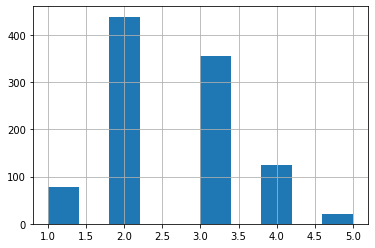

In [270]:
df['SpeedBin'] = 0 #creates a column of 0
df.loc[((df['Speed'] >= 0) & (df['Speed'] < 40)) , 'SpeedBin'] = 1
df.loc[((df['Speed'] >= 40) & (df['Speed'] < 80)) , 'SpeedBin'] = 2
df.loc[((df['Speed'] >= 80) & (df['Speed'] < 120)) , 'SpeedBin'] = 3
df.loc[((df['Speed'] >= 120) & (df['Speed'] < 160)) , 'SpeedBin'] = 4
df.loc[((df['Speed'] >= 160) & (df['Speed'] < 200)) , 'SpeedBin'] = 5
df.AttackBin.hist()

# Final Model Production

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
y = df.Most_used
X = df.drop(['Most_used', 'HP', 'Attack', 'Sp. Attack', 'Defense', 'Sp. Defense', 'Speed'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [112]:
# After reruning data in the above models with new split: Random Forest was the best model for my predictions

In [133]:
df

,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Mega,GalarForm,AlolanForm,Legend,Most_used,AttackBin,Sp. Attack_bin,Sp. Defense_bin,Defense_bin,HP_bin
0,45,49,49,65,65,45,1,0,0,0,0,0,2,2,2,1,1
1,60,62,63,80,80,60,1,0,0,0,0,0,2,3,2,2,2
2,80,82,83,100,100,80,1,0,0,0,0,0,3,3,3,2,2
3,80,100,123,122,120,80,1,1,0,0,0,1,3,4,3,3,2
4,39,52,43,60,50,65,1,0,0,0,0,0,2,2,2,1,1
5,58,64,58,80,65,80,1,0,0,0,0,0,2,3,2,2,2
6,78,84,78,109,85,100,1,0,0,0,0,0,3,3,2,2,2
7,78,130,111,130,85,100,1,1,0,0,0,1,4,4,2,3,2
8,78,104,78,159,115,100,1,1,0,0,0,1,3,4,3,2,2
9,44,48,65,50,64,43,1,0,0,0,0,0,2,2,2,2,1


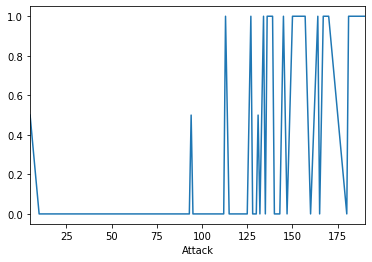

In [203]:
df.groupby('Attack')['Most_used'].median().plot()

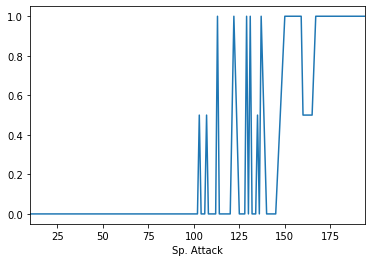

In [205]:
df.groupby('Sp. Attack')['Most_used'].median().plot()

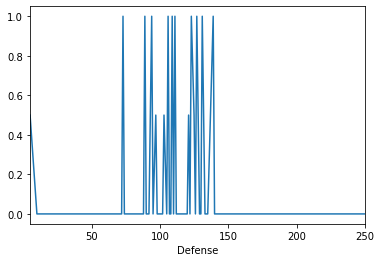

In [206]:
df.groupby('Defense')['Most_used'].median().plot()

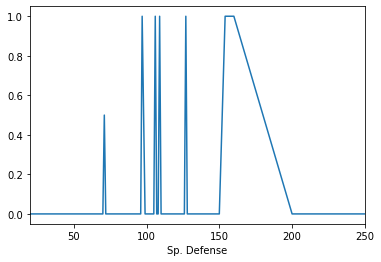

In [347]:
df.groupby('Sp. Defense')['Most_used'].median().plot()

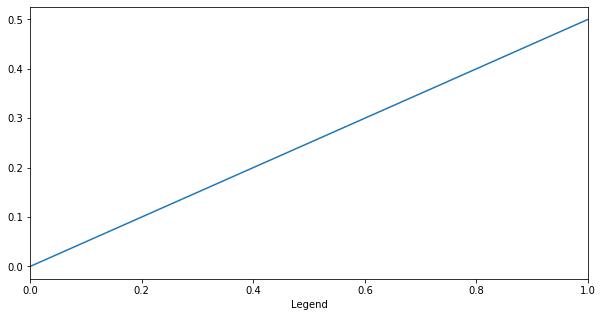

In [415]:
df.groupby('Legend')['Most_used'].median().plot()

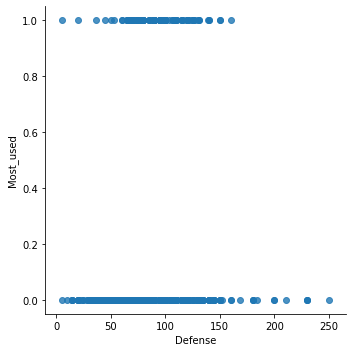

In [368]:
sns.lmplot(x='Defense', y='Most_used', data=df,
           fit_reg=False) # No regression line)

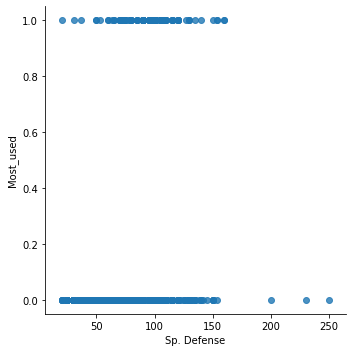

In [369]:
sns.lmplot(x='Sp. Defense', y='Most_used', data=df,
           fit_reg=False) # No regression line)

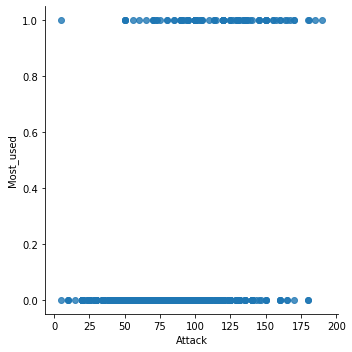

In [371]:
sns.lmplot(x='Attack', y='Most_used', data=df,
           fit_reg=False) # No regression line)

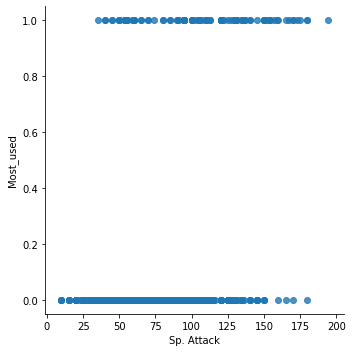

In [372]:
sns.lmplot(x='Sp. Attack', y='Most_used', data=df,
           fit_reg=False) # No regression line)

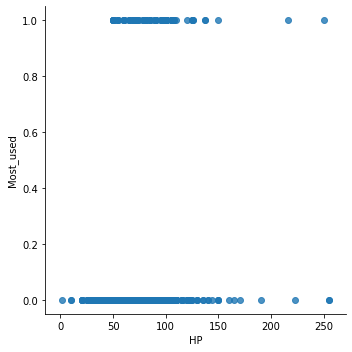

In [417]:
sns.lmplot(x='HP', y='Most_used', data=df,
           fit_reg=False) # No regression line)